In [1]:
# load libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Individual Project Planning

## Data Description
Two datasets were provided for analysis:

In [2]:
players_data <- read_csv("players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### players.csv

The `players.csv` file contains information about each player. It includes 196 observations, with seven variables:
- **experience (chr)**: individual player's skill level.
    - The 5 categories: 'Beginner', 'Amateur', 'Regular', 'Pro', 'Veteran'.
- **subscribe (lgl)**: if player is subscribed or not (true or false).
- **hashedEmail (chr)**: unique anonymised player ID.
- **played_hours (dbl)**: total number of hours played.
    - Median = 0.100
    - Mean = 5.846
- **name (chr)**: first name of the player.
- **gender (chr)**: gender of the player (female or male).
- **Age (dbl)**: age of the player in years.
    - Median = 19.00
    - Mean = 21.14
    - NA's = 2

In [3]:
summary_player <- summary(players_data)
summary_player

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [4]:
sessions_data <- read_csv("sessions.csv")
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### sessions.cvs

The `sessions.csv` file records individual play sessions performed by each player. It contains 1535 observations, including five variables:
- **hashedEmail (chr)**: unique anonymised player ID.
- **start_time (chr)**: session start timestamp. 
- **end_time (chr)**: session end timestamp.
- **original_start_time (dbl)**: session start time in UNIX time (milliseconds)
    - Median = 1.719e+12
    - Mean = 1.719e+12
- **original_end_time (dbl)**: session start time in UNIX time (milliseconds)
    - Median = 1.719e+12
    - Mean = 1.719e+12
    - NA's = 2

In [5]:
summary_sessions <- summary(sessions_data)
summary_sessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

#### Potential Issues

A few potential issues are:

- Self-reported values may contain errors.
- Sampling bias: we are unsure how the players were selected.
- Newsletter subscription behaviour may depend on unmeasured variables.
- Age distribution: younger players make up most of the dataset.
- Experience level may not be standardised.

## Question

#### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
#### Specific Question
Are more experienced or older players more likely to subscribe to the newsletter than new or younger players?

#### Data Relevance
The dataset is relevant to addressing the question because it captures demographic characteristics (age and experience). By analysing these variables, we can assess whether more experienced or older players are more inclined to subscribe, potentially indicating higher interest in the game's community or research goals.

#### Data Wrangling
Minimal wrangling will be required:
- Remove values that do not contribute to the predictions.
- `experience` is a categorical value, so it must be converted into dummy variables.

## Exploratory Data Anlysis and Visualizations

In [6]:
players_data <- read_csv("players.csv",)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [7]:
mean_players <- summarize(players_data, 
                             mean_played_hours = mean(played_hours, na.rm = TRUE), 
                             mean_age = mean(Age, na.rm = TRUE))
mean_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


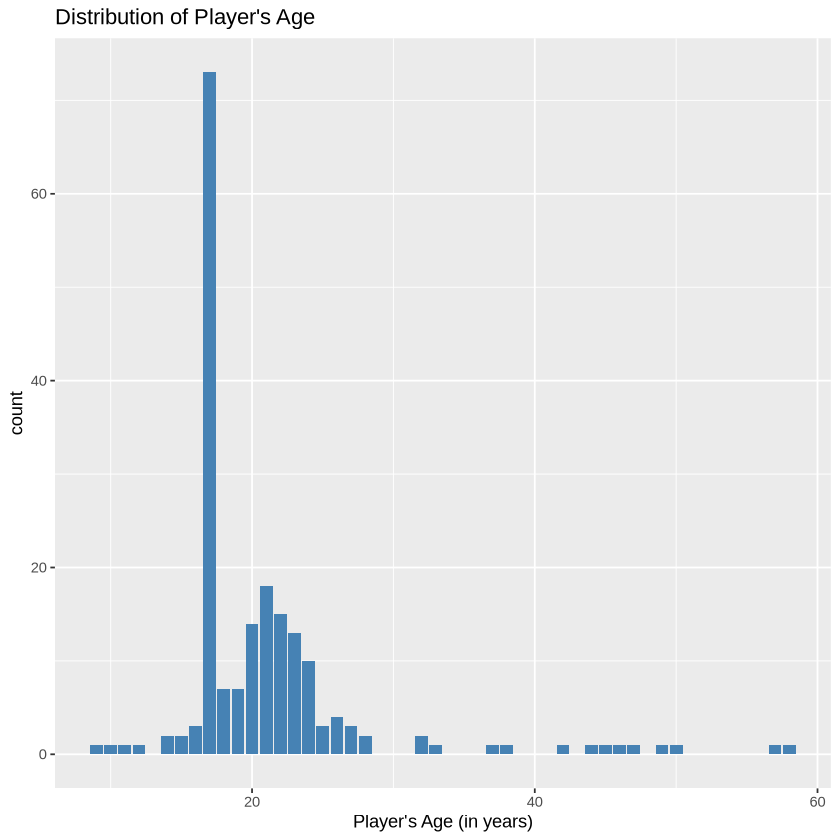

In [8]:
age_dist_plot <- ggplot(players_data, aes(x = Age, fill = experiene)) +
    geom_bar(fill = "steelblue") +
    xlab("Player's Age (in years)") +
    ggtitle("Distribution of Player's Age")
age_dist_plot

## Methods and Plan

To predict whether a player subscribes to the newsletter based on their age, experience, and playtime, we will be using the K-nearest-neighbour classification model.

Since KNN classifies players based on the similarity of their characteristics to others in the dataset, it is the most appropriate option. It also requires minimal assumptions, which include:

- Observations that are close together in feature space are likely to belong to the same class.
- Predictor variables must be numeric and scaled so that distance calculations are meaningful.
- The choice of K significantly affects model performance, so it must be tuned carefully.

However, using the KNN model can present a few potential limitations which are:

- Sensitive to irrelevant variables and scaling.
- Choice of k matters, which must be tuned using cross-validation.
- KNN does not provide easily interpretable coefficients, so interpretation may require additional visual elements.

To select the best KNN model, we first split the data into 80% training and 20% testing sets, stratifying for `subscribe`. The training data is preprocessed by converting `experience` into dummy variables. We then tune k using cross-validation and compare for different values of k. The value of k is then selected, and the corresponding model is then applied to the test dataset. Final evaluation is performed using a confusion matrix, to ensure a fair assessment of model performance.